<a href="https://colab.research.google.com/github/AlexFMo/computational-chemistry/blob/main/3_Perfiles_Reactor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ecuaciones diferenciales:** para resolver ecuaciones diferenciales ordinarias utilizaremos el modulo SciPy

### Resolver la ecuacion diferencial con condiciones iniciales t = 0 s y CA0 = 0.5 M, usando una constante k = 0.2 1/s y hasta t = 30 s. ###

$$\frac{dC_A}{dt} = -kC_A $$

In [ ]:
#importar modules, libraries, etc
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
#es requerido definir una funcion que contenga nuestra ecuacion
#REGLA: la variable dependiente se pasa primero, seguido la variable independiente, y finalmente otras constantes
def ecuacion(CA, t, k):
  dCAdt = -k*CA
  return dCAdt

In [ ]:
#condiciones iniciales
CA0 = 0.5
#definimos un espacio lineal para nuestra variable t
t = np.linspace(0, 30)

In [ ]:
#constante de reaccion
k = 0.2
#resolvemos nuestra ecuacion diferencial con odeint
CA = odeint(ecuacion, CA0, t, args=(k,))

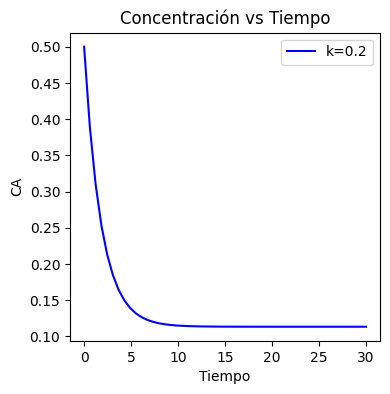

In [ ]:
#graficamos nuestros resultados
fig = plt.figure(figsize=[4, 4])
ax = plt.axes()
ax.plot(t, CA, 'b', label='k=0.2')
ax.set_xlabel('Tiempo')
ax.set_ylabel('CA')
ax.legend()
plt.title('Concentración vs Tiempo')
plt.show()

### Resolver el sistema de ecuaciones diferenciales con condiciones iniciales t = 0 s, x0 = 5 y y0 = 2, para constantes k1 = 0.5 y k2 = 4, hasta t = 30 s.

$$\frac{dx}{dt} = -x*e^{-k_1*y}$$
$$\frac{dy}{dt} = k_2 - y $$

In [ ]:
#definir nuestras funciones aqui


In [ ]:
#condiciones iniciales aqui

#constantes aqui

#espacio lineal tiempo aqui


In [ ]:
#resolvemos nuestro sistema de ecuaciones aqui


In [ ]:
#graficar solucion aqui


### **Ejercicio:** encontrar los perfiles de concentracion de A y B, y el perfil de temperatura del reactor descrito por las ecuaciones diferenciales dadas. Condiciones iniciales son t = 0 min,  CA0 = 0.5 M, T0 = 293 K y CB0 = 0 M. Resolver hasta t = 30 min y las constantes fisicoquimicas estan dadas a continuacion.

$$\frac{dC_A}{dt} = \frac{F}{V}(C_{A0}-C_A)-k_0C_Ae^{-\frac{E}{RT}}$$
$$\frac{dC_B}{dt} = -\frac{F}{V}C_B+k_0C_Ae^{-\frac{E}{RT}}$$
$$\frac{dT}{dt} = \frac{F}{V}(T_0-T)-\frac{\Delta H}{\rho c_p}k_0C_Ae^{-\frac{E}{RT}}-\frac{UA}{V \rho c_p}(T-T_c)$$

### $ F = 1.0 \frac{m^3}{min} $
### $ V = 8.0 m^3 $
### $ k0 = 7.5e14 \frac{1}{min} $
### $ E/R = 9758.3 K $
### $ \Delta H  = -10000 \frac{J}{mol} $
### $ \rho = 950 \frac{kg}{m^3} $
### $ c_p = 3 \frac{J}{kgK} $
### $ U = 3000 \frac{J}{m^2Kmin} $
### $ A = 5 m^2 $
### $ T_c = 278 K $


In [ ]:
#definimos variables
F = 1
V = 8
k0 = 7.5e14
E_R = 9758.3
delta_H = -10000
rho = 950
cp = 3
U = 3000
A = 5
Tc = 278

#definimos condiciones iniciales aqui
CA0 = 0.5
CB0 = 0
T0 = 293

#definimos nuestras funciones aqui
def sistema(s, t, F, V, k0, E_R, delta_H, rho, cp, U, A, Tc):
  CA, CB, T = s
  dCAdt = F/V*(CA0-CA) - k0*CA*np.exp(-E_R/T)
  dCBdt = -F/V*(CB) + k0*CA*np.exp(-E_R/T)
  dTdt = F/V*(T0-T) - (delta_H/rho*cp)*k0*CA*np.exp(-E_R/T) - (U*A/V*rho*cp)*(T-Tc)
  return [dCAdt, dCBdt, dTdt]

In [ ]:
#creamos nuestro espacio lineal para tiempo aqui
t = np.linspace(0, 30)

#resolvemos nuestro sistema de ecuaciones aqui
# solucion = odeint(sistema, [CA0, CB0, T0], L, arg={F, V, k0, E_R, delta_H, rho, cp, U, A, Tc})
solucion = odeint(sistema, [CA0, CB0, T0], t, args=(F, V, k0, E_R, delta_H, rho, cp, U, A, Tc))

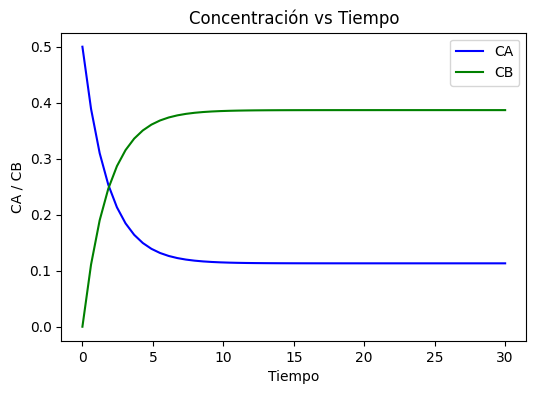

In [ ]:
#graficar solucion aqui
CA = solucion[:,0]
CB = solucion[:,1]
T = solucion[:,2]

fig =  plt.figure(figsize=[6, 4])
ax1 = fig.add_subplot()
ax1.plot(t, CA, color='b', label='CA')
ax1.plot(t, CB, color='g', label='CB')
ax1.set_ylabel('CA / CB')
ax1.set_xlabel('Tiempo')
ax1.legend()
plt.title('Concentración vs Tiempo')
plt.show()
